In [10]:
!python -c "import gwpy; print(gwpy.__version__)"

0.11.0


In [6]:
import gwpy
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import gwpy
!python -c "import gwpy; print(gwpy.__version__)"
!python -V
!python2 -V
!python3 -V
!pip -V
!pip2 -V
!pip3 -V

0.11.0
Python 2.7.13 :: Anaconda 4.3.0 (x86_64)
Python 2.7.13 :: Anaconda 4.3.0 (x86_64)
Python 3.6.0 :: Anaconda custom (x86_64)
pip 18.0 from /Users/brettlv/anaconda2/lib/python2.7/site-packages/pip (python 2.7)
pip 18.0 from /Users/brettlv/anaconda2/lib/python2.7/site-packages/pip (python 2.7)
pip 18.0 from /Users/brettlv/anaconda3/lib/python3.6/site-packages/pip (python 3.6)


In [13]:
from gwpy.timeseries import TimeSeries

In [14]:
data = TimeSeries.fetch_open_data('L1', 968654552, 968654562)

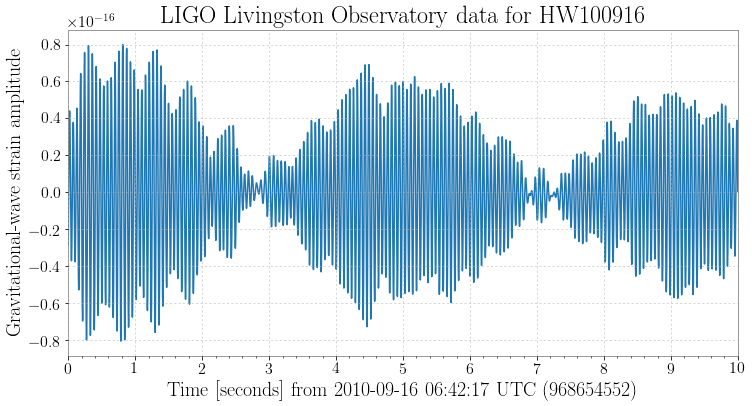

In [15]:
#1. Plotting public LIGO data
plot = data.plot(
    title='LIGO Livingston Observatory data for HW100916',
    ylabel='Gravitational-wave strain amplitude',
)
plot.show()
#plt.savefig('gw1.png')

In [1]:
#2. Filtering a TimeSeries with a ZPK filter
from gwpy.timeseries import TimeSeries
white = TimeSeries.get('L1:OAF-CAL_DARM_DQ', 'March 2 2015 12:00', 'March 2 2015 12:30')

/Users/brettlv/anaconda2/lib/python2.7/site-packages/astropy/table/np_utils.py:19: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _np_utils
/Users/brettlv/anaconda2/lib/python2.7/site-packages/astropy/io/ascii/fastbasic.py:9: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import cparser


ImportError: No module named nds2

In [2]:
from gwpy.timeseries import TimeSeries
data = TimeSeries.get('H1:ASC-Y_TR_A_NSUM_OUT_DQ', 1123084671, 1123084703)

ImportError: No module named nds2

In [3]:
#6. Generate the Q-transform of a TimeSeriesÂ¶
from gwpy.timeseries import TimeSeries
data = TimeSeries.fetch_open_data('H1', 1126259446, 1126259478)

In [4]:
qspecgram = data.q_transform()

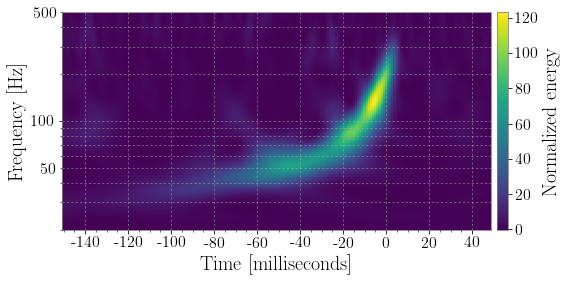

In [7]:
gps = 1126259462.427
plot = qspecgram.crop(gps-.15, gps+.05).plot(figsize=[8, 4])
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.set_xlabel('Time [milliseconds]')
ax.set_ylim(20, 500)
ax.grid(True, axis='y', which='both')
plot.add_colorbar(cmap='viridis', label='Normalized energy')
plot.show()

In [8]:
#7. Calculating the SNR associated with a given astrophysical signal model
from gwpy.timeseries import TimeSeries
data = TimeSeries.fetch_open_data('H1', 1126259446, 1126259478)


In [9]:
high = data.highpass(15)

/Users/brettlv/anaconda2/lib/python2.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [10]:
psd = high.psd(4, 2)
zoom = high.crop(1126259460, 1126259464)

In [11]:
from pycbc.waveform import get_fd_waveform
hp, _ = get_fd_waveform(approximant="IMRPhenomD", mass1=40, mass2=32,
                        f_lower=20, f_final=2048, delta_f=psd.df.value)

In [12]:
import numpy
from pycbc.filter import matched_filter
snr = matched_filter(hp, zoom.to_pycbc(), psd=psd.to_pycbc(),
                     low_frequency_cutoff=15)
snrts = TimeSeries.from_pycbc(snr).abs()

creating /var/folders/wm/18gdyt8563zdv_wpcgsgwd_40000gn/T/weave-brett-sVqKZw/python27_intermediate/compiler_601bd1fb9d5db6423ad25ffa9a66290a
#### ['/usr/bin/clang', '-fno-strict-aliasing', '-I/Users/brettlv/anaconda2/include', '-arch', 'x86_64', '-DNDEBUG', '-g', '-fwrapv', '-O3', '-Wall', '-Wstrict-prototypes'] #######


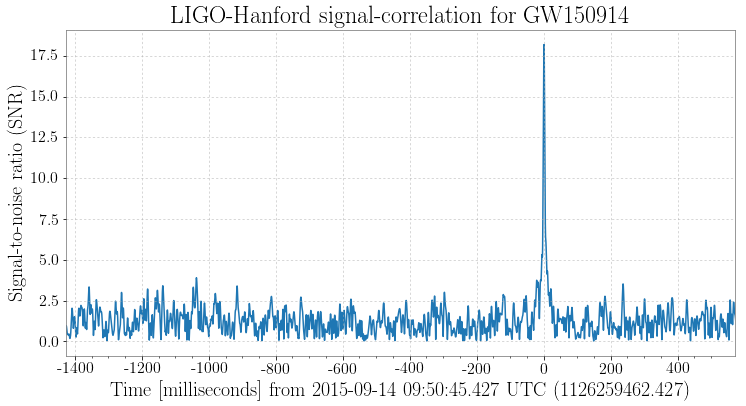

In [13]:
plot = snrts.plot()
ax = plot.gca()
ax.set_xlim(1126259461, 1126259463)
ax.set_epoch(1126259462.427)
ax.set_ylabel('Signal-to-noise ratio (SNR)')
ax.set_title('LIGO-Hanford signal-correlation for GW150914')
plot.show()

In [14]:
#8. Inject a known signal into a TimeSeries

from numpy import random
from gwpy.timeseries import TimeSeries
noise = TimeSeries(random.normal(scale=.1, size=16384), sample_rate=16384)

In [16]:
pwd

u'/Users/brettlv/blog/brettlv.github.io/pythoncode'

In [15]:
from astropy.utils.data import get_readable_fileobj
source = 'https://losc.ligo.org/s/events/GW150914/P150914/'
url = '%s/fig2-unfiltered-waveform-H.txt' % source
with get_readable_fileobj(url) as f:
    signal = TimeSeries.read(f, format='txt')
signal.t0 = .5  # make sure this intersects with noise time samples

In [17]:
signal = signal.taper()

In [18]:
data = noise.inject(signal)

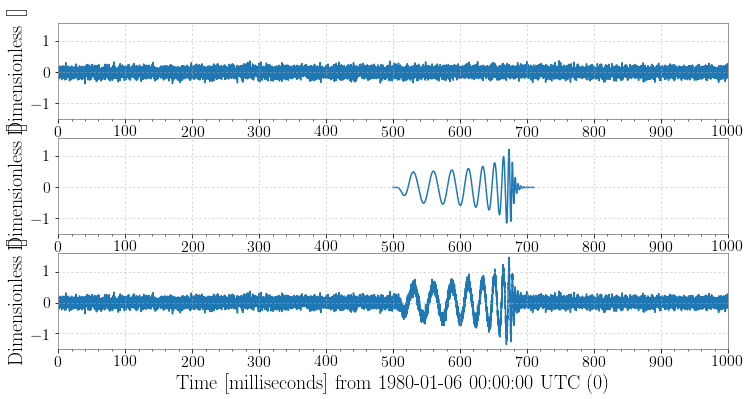

In [19]:
from gwpy.plotter import TimeSeriesPlot
plot = TimeSeriesPlot(noise, signal, data, sep=True, sharex=True, sharey=True)
plot.set_epoch(0)
plot.show()

In [20]:
#2.1

from gwpy.timeseries import TimeSeries
lho = TimeSeries.fetch_open_data('H1', 1126259446, 1126259478)
llo = TimeSeries.fetch_open_data('L1', 1126259446, 1126259478)

In [29]:
lhoasd = lho.asd(4, 2)
lloasd = llo.asd(4, 2)

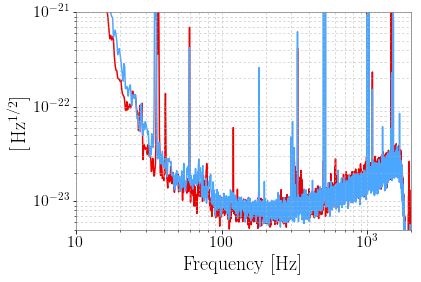

In [38]:
plot = lhoasd.plot(label='LIGO-Hanford', color='gwpy:ligo-hanford')
ax = plot.gca()
ax.plot(lloasd, label='LIGO-Livingston', color='gwpy:ligo-livingston')
ax.set_xlim(10, 2000)
ax.set_ylim(5e-24, 1e-21)
plot.show()